# Distributions

In this notebook I want to talk about common distributions in statistics. Let's start it!

## Binomial Distribution
Binomial Distribution as it sounds the its data is binary or the data has two categories such as yes/no, choos/not choose, and 0/1, and etc. A famous exapmle here is tossing a coin which has two possible outcomes: tails and heads. Now here are the definitions:
* Trial: An event with a discrete outcome (example: heads or tails)
* Success: If the desired outcome is gained.
* Binomial: If there are two outcomes.
* Binomial trails: If the trial has two outcomes.
* Binomial distribution: Distribution of number of success through n number of trials.


Below is the code to generate the number of trials as an example the number of trails is *n* = 1 with size of 4. We can say in this sample size there are 4 coins which are tossed once so *size* is 4. *p* is the probability of the success. The probabiblity of heads and tails are equal so *p* = 0.5. Let say here the *tails* = 0 and *heads* = 1. As an example can we say there are four coins which each of them is tossed once?

In [1]:
from numpy import random

x = random.binomial(n=1, p=0.5, size=4)
x

array([1, 0, 0, 0])

In the plot below we can see that the number of times which tails come true is 3 and the heads is 1. 

/home/mn/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


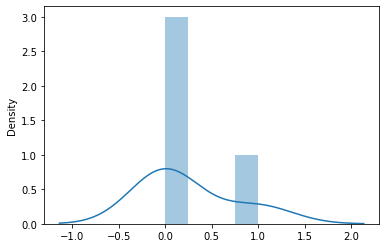

In [12]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(random.binomial(n=1, p=0.5, size=4), hist=True, kde=True)

plt.show() 

In [3]:
x = random.binomial(n=1, p=0.5, size=3)
x

array([1, 1, 0])

## Chie-Square Distribution
A chi-square distribution is a continuous distribution with k degrees of freedom. It is used to describe the distribution of a sum of squared random variables. It is also used to test the goodness of fit of a distribution of data, whether data series are independent, and for estimating confidences surrounding variance and standard deviation for a random variable from a normal distribution. Additionally, chi-square distribution is a special case of the gamma distribution. [source link](https://www.sciencedirect.com/topics/mathematics/chi-square-distribution)

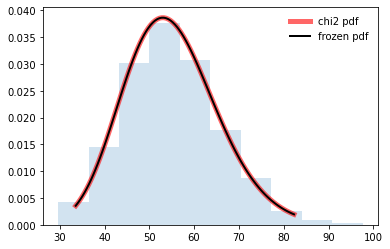

In [4]:
from scipy.stats import chi2
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1)

df = 55
mean, var, skew, kurt = chi2.stats(df, moments='mvsk')

x = np.linspace(chi2.ppf(0.01, df),chi2.ppf(0.99, df), 100)

ax.plot(x, chi2.pdf(x, df),'r-', lw=5, alpha=0.6, label='chi2 pdf')

rv = chi2(df)

ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

vals = chi2.ppf([0.001, 0.5, 0.999], df)

np.allclose([0.001, 0.5, 0.999], chi2.cdf(vals, df))
r = chi2.rvs(df, size=1000)

ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)

ax.legend(loc='best', frameon=False)

plt.show()

## F-Distribution
The F distribution is the ratio of two chi-square distributions with degrees of freedom ν1 and ν2, respectively, where each chi-square has first been divided by its degrees of freedom. [link to the information](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3665.htm)

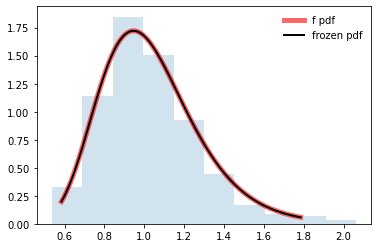

In [5]:
from scipy.stats import f
import matplotlib.pyplot as plt

dfn = 100
dfd = 55
fig, ax = plt.subplots(1, 1)
x = np.linspace(f.ppf(0.01, dfn, dfd), f.ppf(0.99, dfn, dfd), 100)

ax.plot(x, f.pdf(x, dfn, dfd), 'r-', lw=5, alpha=0.6, label='f pdf')
rv = f(dfn, dfd)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

vals = f.ppf([0.001, 0.5, 0.999], dfn, dfd)
np.allclose([0.001, 0.5, 0.999], f.cdf(vals, dfn, dfd))

r = f.rvs(dfn, dfd, size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)

ax.legend(loc='best', frameon=False)

plt.show()

## Poison Distributions
The occurance of a new event is independet from the last event and it tells about the probability of a given number of events occurring in a fixed interval of time. The probability mass function (pmf) with *Poisson distribution* with parameter lambda is defined as:

P(X = x), exp(-lambda).lambda^x/x!

Below is a poisson dataset with the mean 10 and the size 10

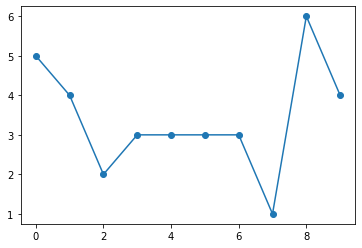

In [6]:
from scipy.stats import poisson

data = poisson.rvs(mu=3, size=10) 
plt.plot(data,'-o')

Below is a code to calculate the probablity. As an example let's say a store sales 10 pencills per day what is the probability of celling 4 pencills per day?

In [7]:
# calculate the probability
poisson.pmf(k=4, mu=10)

0.01891663740103538

## Exponential Distribution

The *Exponential Distribution* is used to model the waiting times like waiting for a bus to come or, failure times, renewal times. The probability density function in this kind of distribution is:

*f(x) = (1/lambda).Exp(-x/lambda)*

To generate the data points:


In [17]:
from numpy import random 

# scale is the inverse of rate, and size is the shape of the array
x = random.exponential(scale=2, size=(2, 3))
x

array([[1.0574081 , 0.6120858 , 3.07904484],
       [0.14158372, 0.55267703, 0.02685147]])

To plot the *Exponential Distribution*:

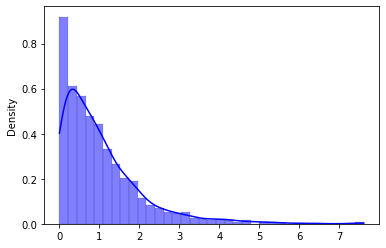

In [36]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(random.exponential(size=1000), color="blue", label="100% Equities", kde=True, stat="density", linewidth=0.1)

plt.show() 

## Weibull Distribution

The *probability density function* is defined as below:

$f(x;\lambda, k) = (k/\lambda)^{k-1} Exp(-(x/\lambda)^k)$, for $x >=0$

which $k$ is a shape parameter and $\lambda$ is the scale parameter of the distribution. this is used to describle particle size distribution. 

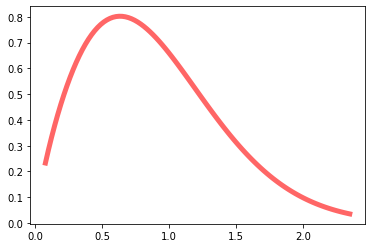

In [21]:
from scipy.stats import weibull_min

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

c = 1.79

mean, var, skew, kurt = weibull_min.stats(c, moments='mvsk')

x = np.linspace(weibull_min.ppf(0.01, c),weibull_min.ppf(0.99, c), 100)

ax.plot(x, weibull_min.pdf(x, c),'r-', lw=5, alpha=0.6, label='weibull_min pdf')